# Satellite Image Classification

The "Satellite Image Classification" dataset on Kaggle is a collection of satellite images labeled with classes such as "Cloudy", "Desert", "Green_Area", and "Water". The data is made up of satellite images of size 256x256, and can be used for computer vision tasks such as image classification.

# Satellite Image Classification Model

---

# GPU Being Used:

In [20]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### Install NVIDIA SMI

In [24]:
pip install nvidia-smi

### Opening Zip File for Data

In [12]:
from zipfile import ZipFile
file_name = "/content/archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# Data Pre-processing:

In [25]:
import pandas as pd
import os

# Create an empty dataframe
data = pd.DataFrame(columns=['image_path', 'label'])

# Define the labels/classes
labels = {'/content/data/cloudy' : 'Cloudy',
          '/content/data/desert' : 'Desert',
          '/content/data/green_area' : 'Green_Area',
          '/content/data/water' : 'Water',
           }

In [27]:
import pandas as pd
import os

# Create an empty list to store data
data_list = []

# Define the labels/classes
labels = {'/content/data/cloudy' : 'Cloudy',
          '/content/data/desert' : 'Desert',
          '/content/data/green_area' : 'Green_Area',
          '/content/data/water' : 'Water',
           }

# Loop over the folders and extract the image path and label
for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        data_list.append({'image_path': image_path, 'label': label})

# Convert the list of dictionaries to a DataFrame
data = pd.DataFrame(data_list)

# Save the data to a CSV file
data.to_csv('image_dataset.csv', index=False)

In [28]:
# Save the data to a CSV file
data.to_csv('image_dataset.csv', index=False)

### Installing Keras

In [30]:
!pip install keras

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [33]:
# Load the dataset
df = pd.read_csv("/content/image_dataset.csv")

In [34]:
df

,image_path,label
0,/content/data/cloudy/train_1698.jpg,Cloudy
1,/content/data/cloudy/train_32431.jpg,Cloudy
2,/content/data/cloudy/train_17406.jpg,Cloudy
3,/content/data/cloudy/train_21151.jpg,Cloudy
4,/content/data/cloudy/train_34770.jpg,Cloudy
...,...,...
5626,/content/data/water/SeaLake_2900.jpg,Water
5627,/content/data/water/SeaLake_1209.jpg,Water
5628,/content/data/water/SeaLake_859.jpg,Water
5629,/content/data/water/SeaLake_1744.jpg,Water


In [35]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [36]:
# Pre-process the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   vertical_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=32,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=32,
                                                  class_mode="categorical")


Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


# Deep Learning Model

In [37]:
# Build a deep learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 1538s 11s/step - accuracy: 0.5792 - loss: 0.9538 - val_accuracy: 0.4392 - val_loss: 0.7720
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1520s 11s/step - accuracy: 0.6726 - loss: 0.6155 - val_accuracy: 0.7214 - val_loss: 0.5326
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1514s 11s/step - accuracy: 0.8051 - loss: 0.4498 - val_accuracy: 0.8651 - val_loss: 0.3285
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1572s 11s/step - accuracy: 0.8303 - loss: 0.4176 - val_accuracy: 0.8545 - val_loss: 0.3940
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1539s 11s/step - accuracy: 0.8138 - loss: 0.4731 - val_accuracy: 0.8900 - val_loss: 0.2783


In [41]:
num_samples = test_df.shape[0]
num_samples

1127

In [42]:
score = model.evaluate(test_generator,
                       steps=num_samples//32+1,
                       )

36/36 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.8908 - loss: 0.2749


In [43]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

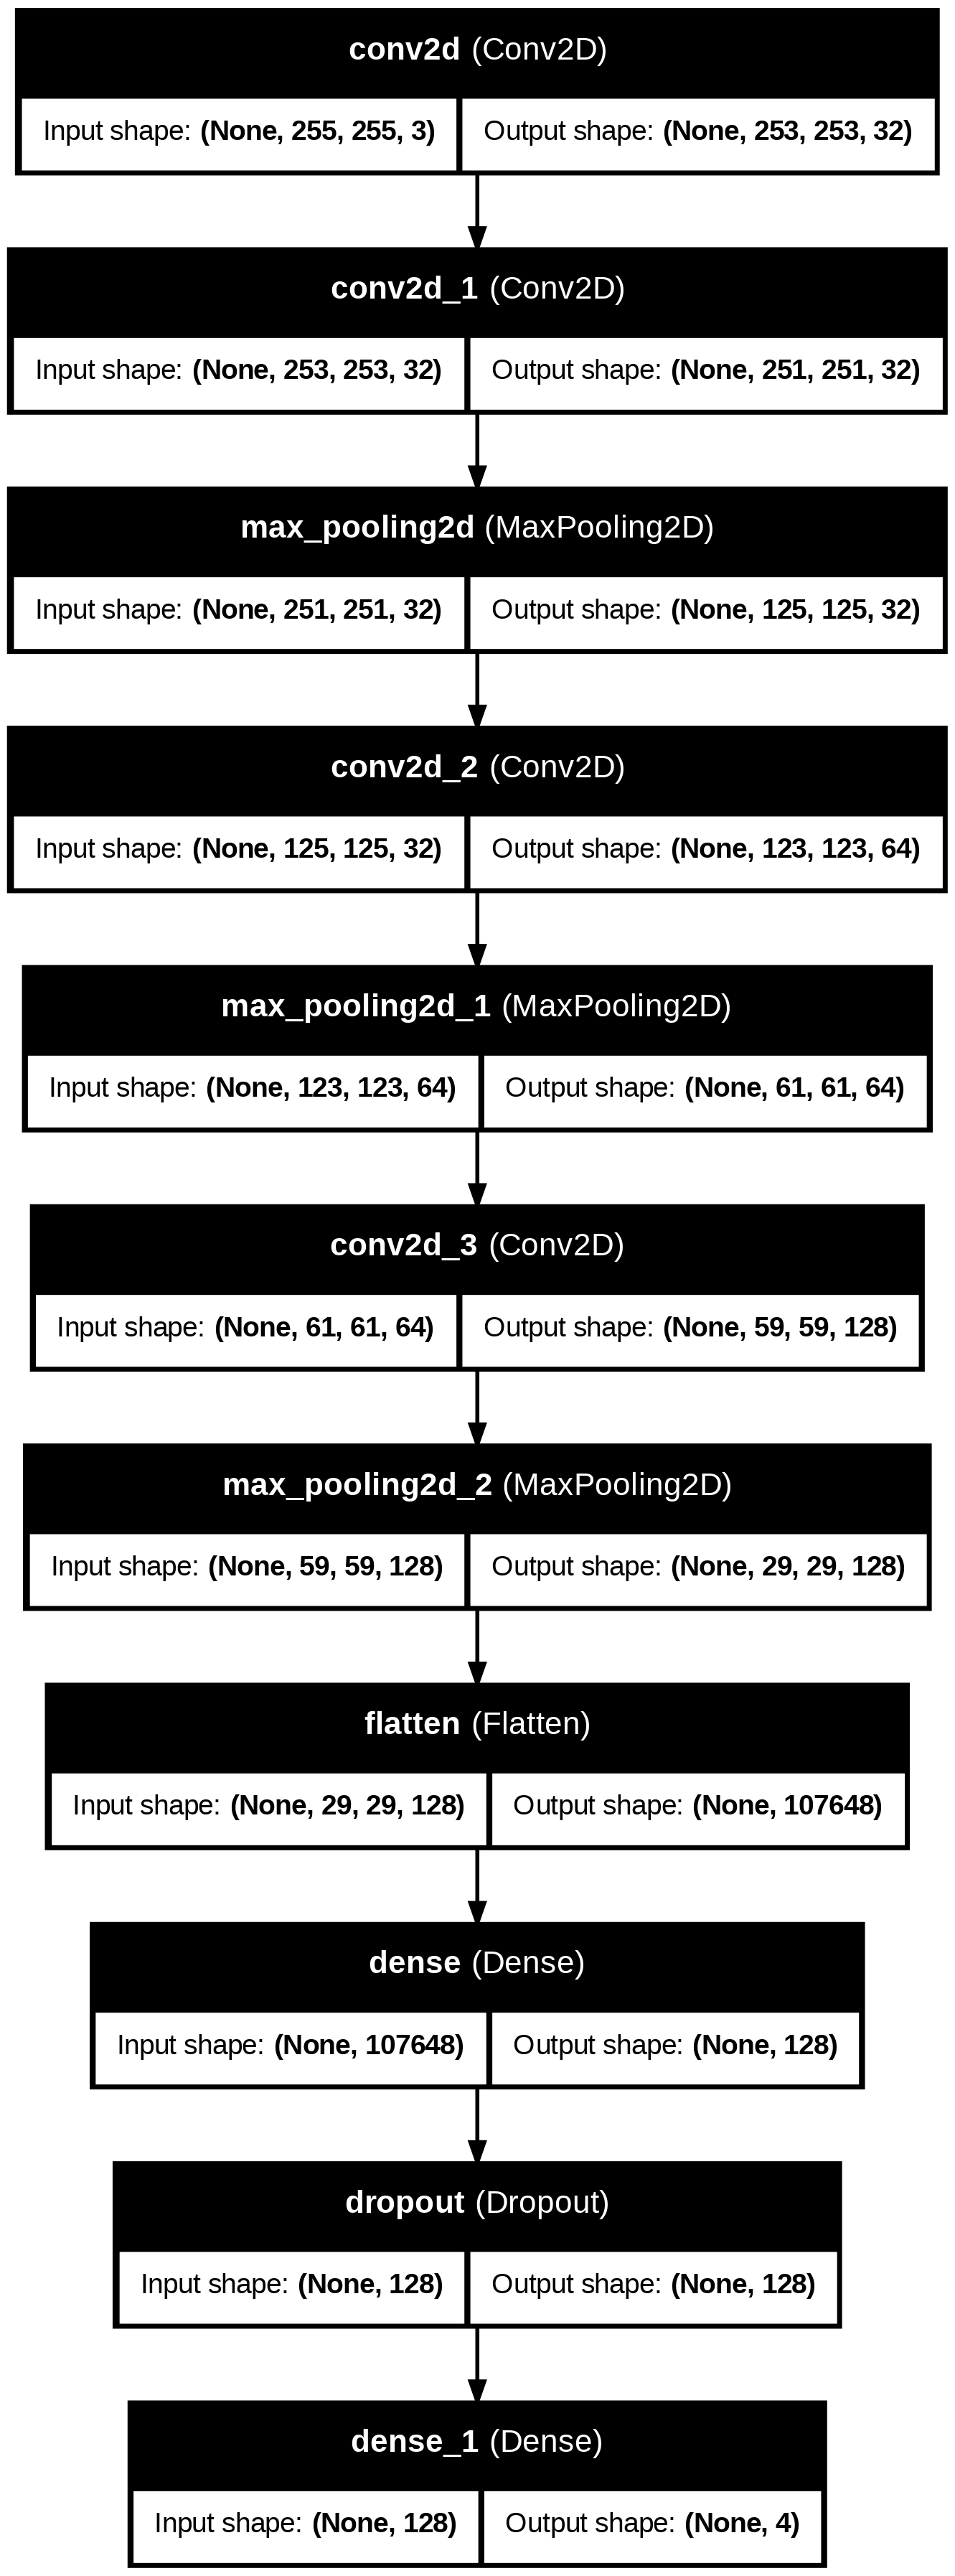

In [44]:
from tensorflow.keras.utils import plot_model
from PIL import Image

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

# Loss & Accuracy Visualizations

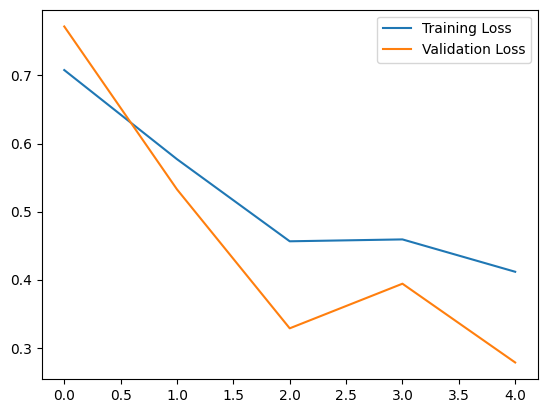

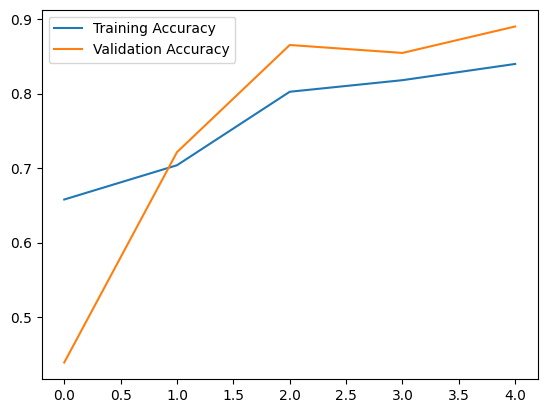

<Figure size 640x480 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Saving Our Model

In [46]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('Model.h5')

In [47]:
# Load the model
model = load_model("Model.h5")

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

In [52]:
# Load an image from the test set
img = load_img("/content/data/green_area/Forest_1768.jpg", target_size=(255, 255))

In [53]:
# Convert the image to an array
img_array = img_to_array(img)
img_array

array([[[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       ...,

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]]

In [54]:
img_array.shape

(255, 255, 3)

In [55]:
# Normalize the image pixel values to the range [0, 1]
img_array = img_array / 255.0
img_array

array([[[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       ...,

       [[0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0

In [56]:
import numpy as np
img_array = np.reshape(img_array, (1, 255, 255, 3))

# Using Our Model For Predictions

In [57]:
# Get the model predictions
predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


In [58]:
# Get the class index with the highest predicted probability
class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_label = class_names[class_index]

print("The image is predicted to be '{}'.".format(predicted_label))

The image is predicted to be 'Green_Area'.


In [59]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [61]:
predictions = model.predict(test_generator)

36/36 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step


In [62]:
predictions

array([[9.9640179e-01, 3.5982637e-03, 2.4953902e-13, 2.7562791e-08],
       [9.8867977e-01, 1.1033717e-02, 1.0891149e-06, 2.8554944e-04],
       [1.4053431e-04, 3.3459756e-07, 6.9135326e-01, 3.0850589e-01],
       ...,
       [9.9899286e-01, 9.7318710e-04, 4.9464290e-09, 3.3896664e-05],
       [6.1565414e-03, 9.9384344e-01, 8.8694373e-12, 5.1758349e-09],
       [1.0248165e-04, 2.4750634e-07, 6.8180972e-01, 3.1808752e-01]],
      dtype=float32)

In [63]:
actual_labels = test_generator.classes

In [64]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([0, 0, 2, ..., 0, 1, 2])

In [65]:
cm = confusion_matrix(actual_labels, predicted_labels)

In [66]:
print(cm)

[[83 72 95 78]
 [70 50 56 51]
 [69 67 82 66]
 [75 69 74 70]]


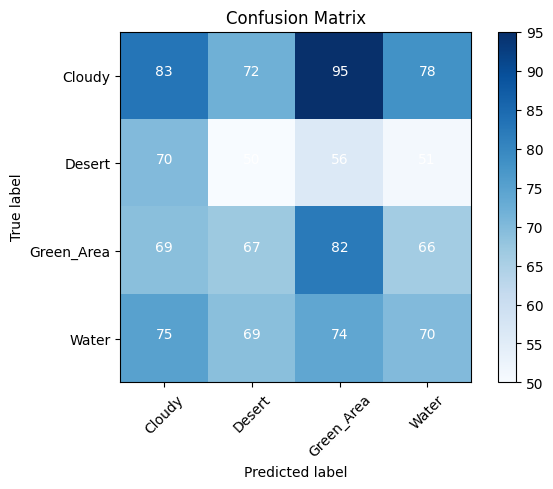

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Confusion matrix


# Plot the confusion matrix as an image
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add the class labels to the plot
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add values to the plot
threshold = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Advanced Predictions From URLs

In [68]:
from io import BytesIO
import requests
from tensorflow.keras.preprocessing import image
import numpy as np
import tempfile

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

url_list = ['https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpg',
            'https://images.theconversation.com/files/258323/original/file-20190211-174861-jya1so.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1356&h=668&fit=crop',
            'https://img.freepik.com/free-photo/amazing-beautiful-sky-with-clouds_58702-1657.jpg?w=2000',
            'https://i.natgeofe.com/n/54c007c9-50e5-4cf5-83dc-978a35a4373a/68576_16x9.jpg',
           ]


for url in url_list:
    response = requests.get(url)
    with tempfile.NamedTemporaryFile(mode='wb') as f:
        f.write(response.content)
        f.seek(0)
        img = image.load_img(f.name, target_size=(255, 255))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)

        classes = model.predict(img, batch_size=10)
        class_index = np.argmax(classes[0])
        predicted_label = class_names[class_index]
        print(url + "The image is predicted to be '{}'.".format(predicted_label))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpgThe image is predicted to be 'Desert'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
https://images.theconversation.com/files/258323/original/file-20190211-174861-jya1so.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1356&h=668&fit=cropThe image is predicted to be 'Water'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
https://img.freepik.com/free-photo/amazing-beautiful-sky-with-clouds_58702-1657.jpg?w=2000The image is predicted to be 'Cloudy'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
https://i.natgeofe.com/n/54c007c9-50e5-4cf5-83dc-978a35a4373a/68576_16x9.jpgThe image is predicted to be 'Desert'.


## Prediction From Uploaded Images
- We provided an image of the area of focus for our project to check for desertification and as we analyze the image the prediction comes out to be desert.

Saving LC09_L1TP_168075_20230916_20230916_02_T1_refl.tif to LC09_L1TP_168075_20230916_20230916_02_T1_refl (1).tif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


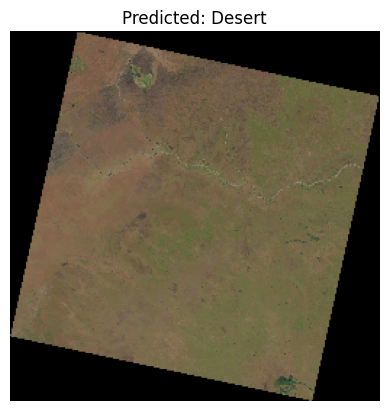

In [70]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('Model.h5')

class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

def predict_image(uploaded_file):
    # Load and process the image
    img = image.load_img(uploaded_file, target_size=(255, 255))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

uploaded = files.upload()

for uploaded_file in uploaded.keys():
    predict_image(uploaded_file)


## Uploaded Image Prediction With Percentages

In [ ]:
# Load the model from /content/Model.h5
model = load_model("/content/Model.h5")

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

def predict_image(uploaded_file):
    # Load and process the image
    img = load_img(uploaded_file, target_size=(255, 255))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Get the model predictions
    predictions = model.predict(img_array)[0]
    class_predictions = [(class_name, predictions[i] * 100) for i, class_name in enumerate(class_names)]

    # Sorts
    class_predictions.sort(key=lambda x: x[1], reverse=True)

    # Display the sorted prediction
    for class_name, percentage in class_predictions:
        print(f"{class_name}: {percentage:.2f}%")
    
    predicted_class = class_names[np.argmax(predictions)]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

uploaded = files.upload()

for uploaded_file in uploaded.keys():
    predict_image(uploaded_file)

### ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
x_test = test_generator[0][0] 

n_classes = len(class_names)

y_true_binarized = label_binarize(y_true, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {class_names[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multi-Class')
plt.legend(loc='lower right')
plt.show()


### Precision-Recall Curve for Multiclass Classification

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute Precision-Recall and plot curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    precision, recall, _ = precision_recall_curve(y_true_binarized[:, i], y_pred_proba[:, i])
    average_precision = average_precision_score(y_true_binarized[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, lw=2, label=f'Precision-Recall curve for class {class_names[i]} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Multi-Class')
plt.legend(loc='lower left')
plt.show()

### Class-wise Precision, Recall, and F1-Score

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_pred and y_true are defined
# Generate the classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Convert to DataFrame for easier plotting
df_report = pd.DataFrame(report).transpose()

# Plotting Precision, Recall, and F1-Score
df_report[['precision', 'recall', 'f1-score']].iloc[:-1, :].plot(kind='bar', figsize=(10, 6))
plt.title('Class-wise Precision, Recall, and F1-Score')
plt.show()